# Lab 01 - Regression

In [1]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

## 1. Implement from scratch

### 1.1. Simple Linear Regression

In [2]:
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1, 2, 1.3, 3.75, 2.25])
print("X:", X)
print("y:", y)

X: [[1]
 [2]
 [3]
 [4]
 [5]]
y: [1.   2.   1.3  3.75 2.25]


In [3]:
class SimpleLinearRegression:
    pass
    # TODO: Implement fit and predict methods

In [4]:
# TODO: Predicting using SimpleLinearRegression


In [5]:
# TODO: Visualizing the results (scatter plot and regression line)

### 1.2 Multiple Linear Regression

In [ ]:
X = np.array(
    [
        [1,1,1],
        [1,1,2],
        [1,2,2],
        [1,0,1]
    ]
)

Y = np.array([
    3.25,
    6.5,
    3.5,
    5.0
])

In [ ]:
class MultipleLinearRegression:
    pass
    # TODO: Implement fit and predict methods

In [ ]:
# TODO: Predicting using MultipleLinearRegression

In [ ]:
# TODO: VIsualizing the results (scatter plot and regression line)

### 1.3 Gradient Descent

In [ ]:
# TODO: Implement gradient descent algorithm

In [ ]:
def func(x):
    return x**2 - 4*x + 1

def grad_func(x):
    return 2*x - 4


Optimized result: 1.976941569907863


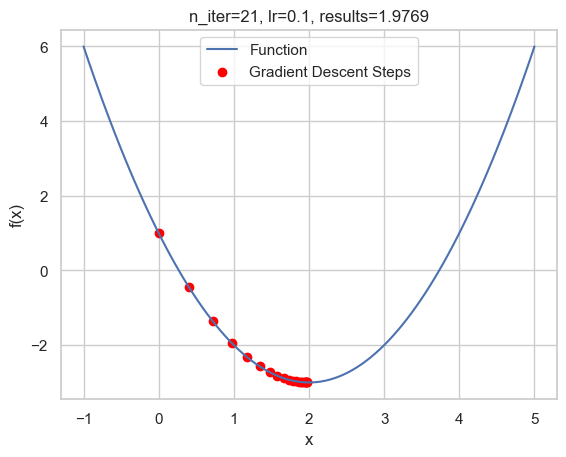

In [51]:
lr = 0.1

history, result = gradient_descent(
    starting_point=0.0,
    gradient_func=grad_func,
    learning_rate=lr,
    max_iter=20,
    tolerance=1e-6
)
print("Optimized result:", result)

history_array = np.array(history)
x_vals = np.linspace(-1, 5, 100)
y_vals = func(x_vals)

plt.plot(x_vals, y_vals, label='Function')
plt.scatter(history_array, func(history_array), color='red', label='Gradient Descent Steps')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f'n_iter={len(history)}, lr={lr}, results={result:.4f}')

plt.show()

## 2. Using scikit-learn

### 2.1. Load dataset

- In this lab, we use dataset [Auto MPG](https://archive.ics.uci.edu/dataset/9/auto+mpg) (id=9).
- We want to predict Miles Per Gallon (MPG) - a measure of a vehicle's fuel efficiency. It shows how many miles a car can travel on one gallon of fuel. A higher MPG means a car is more fuel-efficient, travels further on less fuel, and can result in lower running costs.

In [6]:
try:
    from ucimlrepo import fetch_ucirepo
except ImportError:
    !pip install ucimlrepo
    from ucimlrepo import fetch_ucirepo

In [7]:

# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 

In [8]:
auto_mpg.metadata

{'uci_id': 9,
 'name': 'Auto MPG',
 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg',
 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv',
 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption',
 'area': 'Other',
 'tasks': ['Regression'],
 'characteristics': ['Multivariate'],
 'num_instances': 398,
 'num_features': 7,
 'feature_types': ['Real', 'Categorical', 'Integer'],
 'demographics': [],
 'target_col': ['mpg'],
 'index_col': ['car_name'],
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1993,
 'last_updated': 'Thu Aug 10 2023',
 'dataset_doi': '10.24432/C5859H',
 'creators': ['R. Quinlan'],
 'intro_paper': None,
 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had 

In [9]:
auto_mpg.variables

,name,role,type,demographic,description,units,missing_values
0,displacement,Feature,Continuous,None,None,None,no
1,mpg,Target,Continuous,None,None,None,no
2,cylinders,Feature,Integer,None,None,None,no
3,horsepower,Feature,Continuous,None,None,None,yes
4,weight,Feature,Continuous,None,None,None,no
5,acceleration,Feature,Continuous,None,None,None,no
6,model_year,Feature,Integer,None,None,None,no
7,origin,Feature,Integer,None,None,None,no
8,car_name,ID,Categorical,None,None,None,no


In [10]:
X.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin
0,307.0,8,130.0,3504,12.0,70,1
1,350.0,8,165.0,3693,11.5,70,1
2,318.0,8,150.0,3436,11.0,70,1
3,304.0,8,150.0,3433,12.0,70,1
4,302.0,8,140.0,3449,10.5,70,1


In [11]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


### 2.2. EDA

#### General sanity check

In [12]:
# Combine features and target into a single DataFrame for EDA
df = pd.concat([X, y], axis=1)

In [13]:
df.isna().sum()

displacement    0
cylinders       0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   mpg           398 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [15]:
df.describe()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
count,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,193.425879,5.454774,104.469388,2970.424623,15.568090,76.010050,1.572864,23.514573
std,104.269838,1.701004,38.491160,846.841774,2.757689,3.697627,0.802055,7.815984
min,68.000000,3.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,104.250000,4.000000,75.000000,2223.750000,13.825000,73.000000,1.000000,17.500000
50%,148.500000,4.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,23.000000
75%,262.000000,8.000000,126.000000,3608.000000,17.175000,79.000000,2.000000,29.000000
max,455.000000,8.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


In [16]:
df.sample(5)

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
308,151.0,4,90.0,2556,13.2,79,1,33.5
12,400.0,8,150.0,3761,9.5,70,1,15.0
378,105.0,4,63.0,2125,14.7,82,1,38.0
317,97.0,4,78.0,2188,15.8,80,2,34.3
140,304.0,8,150.0,4257,15.5,74,1,14.0


In [17]:
df['origin'].unique()

array([1, 3, 2])

In [18]:
# Check cases where 'horsepower' is missing
df[df['horsepower'].isna()]

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
32,98.0,4,NaN,2046,19.0,71,1,25.0
126,200.0,6,NaN,2875,17.0,74,1,21.0
330,85.0,4,NaN,1835,17.3,80,2,40.9
336,140.0,4,NaN,2905,14.3,80,1,23.6
354,100.0,4,NaN,2320,15.8,81,2,34.5
374,151.0,4,NaN,3035,20.5,82,1,23.0


In [19]:
# Fill missing 'horsepower' values with the median
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())
df.isna().sum()

displacement    0
cylinders       0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
mpg             0
dtype: int64

In [20]:
df.iloc[32,:]

displacement      98.0
cylinders          4.0
horsepower        93.5
weight          2046.0
acceleration      19.0
model_year        71.0
origin             1.0
mpg               25.0
Name: 32, dtype: float64

#### Univariate analysis

Study the distribution of each variable individually

array([[<Axes: title={'center': 'displacement'}>,
        <Axes: title={'center': 'horsepower'}>],
       [<Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'acceleration'}>],
       [<Axes: title={'center': 'mpg'}>, <Axes: >]], dtype=object)

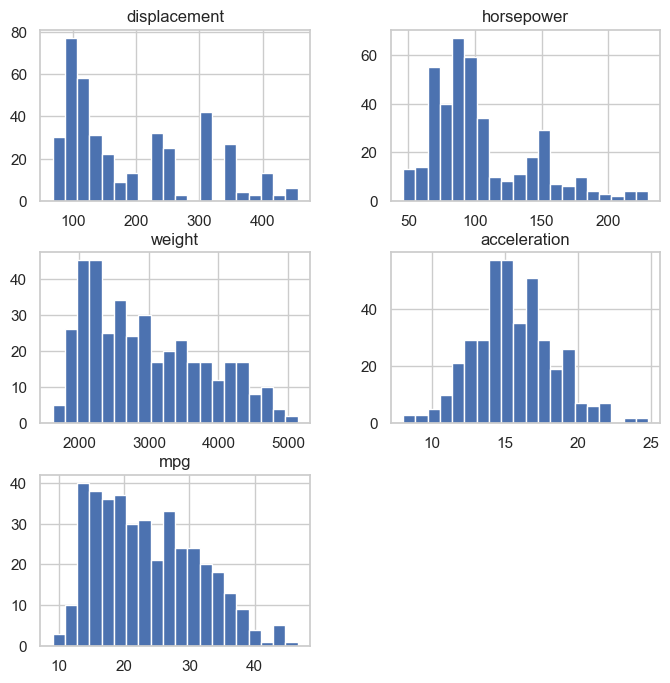

In [21]:
# Check distribution of numerical columns
cat_cols = ['cylinders', 'model_year', 'origin']
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_cols = [col for col in num_cols if col not in cat_cols]

df[num_cols].hist(bins=20, figsize=(8,8))

Unique values in cylinders: [8 4 6 3 5]
Unique values in model_year: [70 71 72 73 74 75 76 77 78 79 80 81 82]
Unique values in origin: [1 3 2]


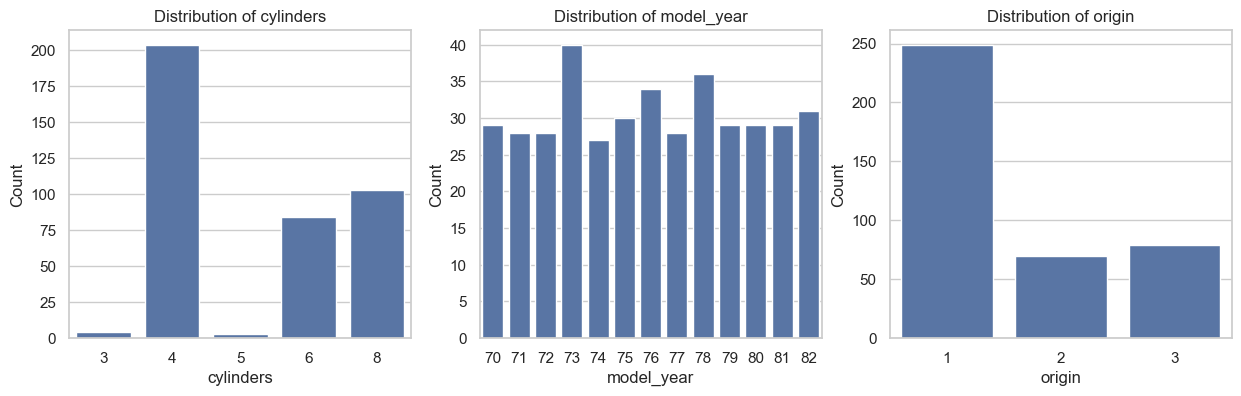

In [22]:
# Check unique values in categorical columns
for col in cat_cols:
    print(f"Unique values in {col}: {df[col].unique()}")

# Check distributin of unque values in categorical columns
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df, ax=axs[i])
    axs[i].set_title(f'Distribution of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Count')

### 2.4. Multivariate analysis

Explore interactions among multiple features

<Axes: >

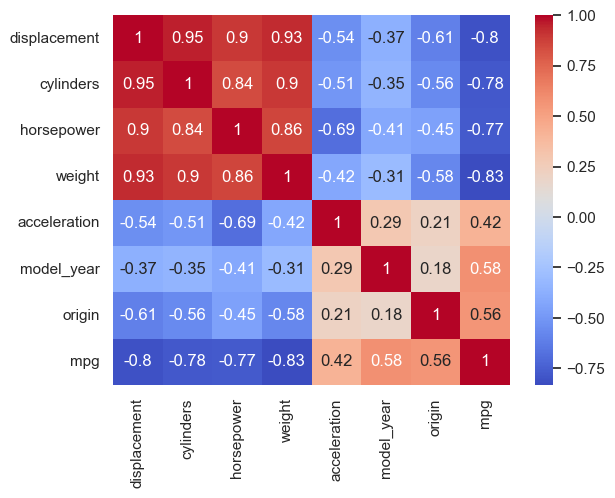

In [23]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

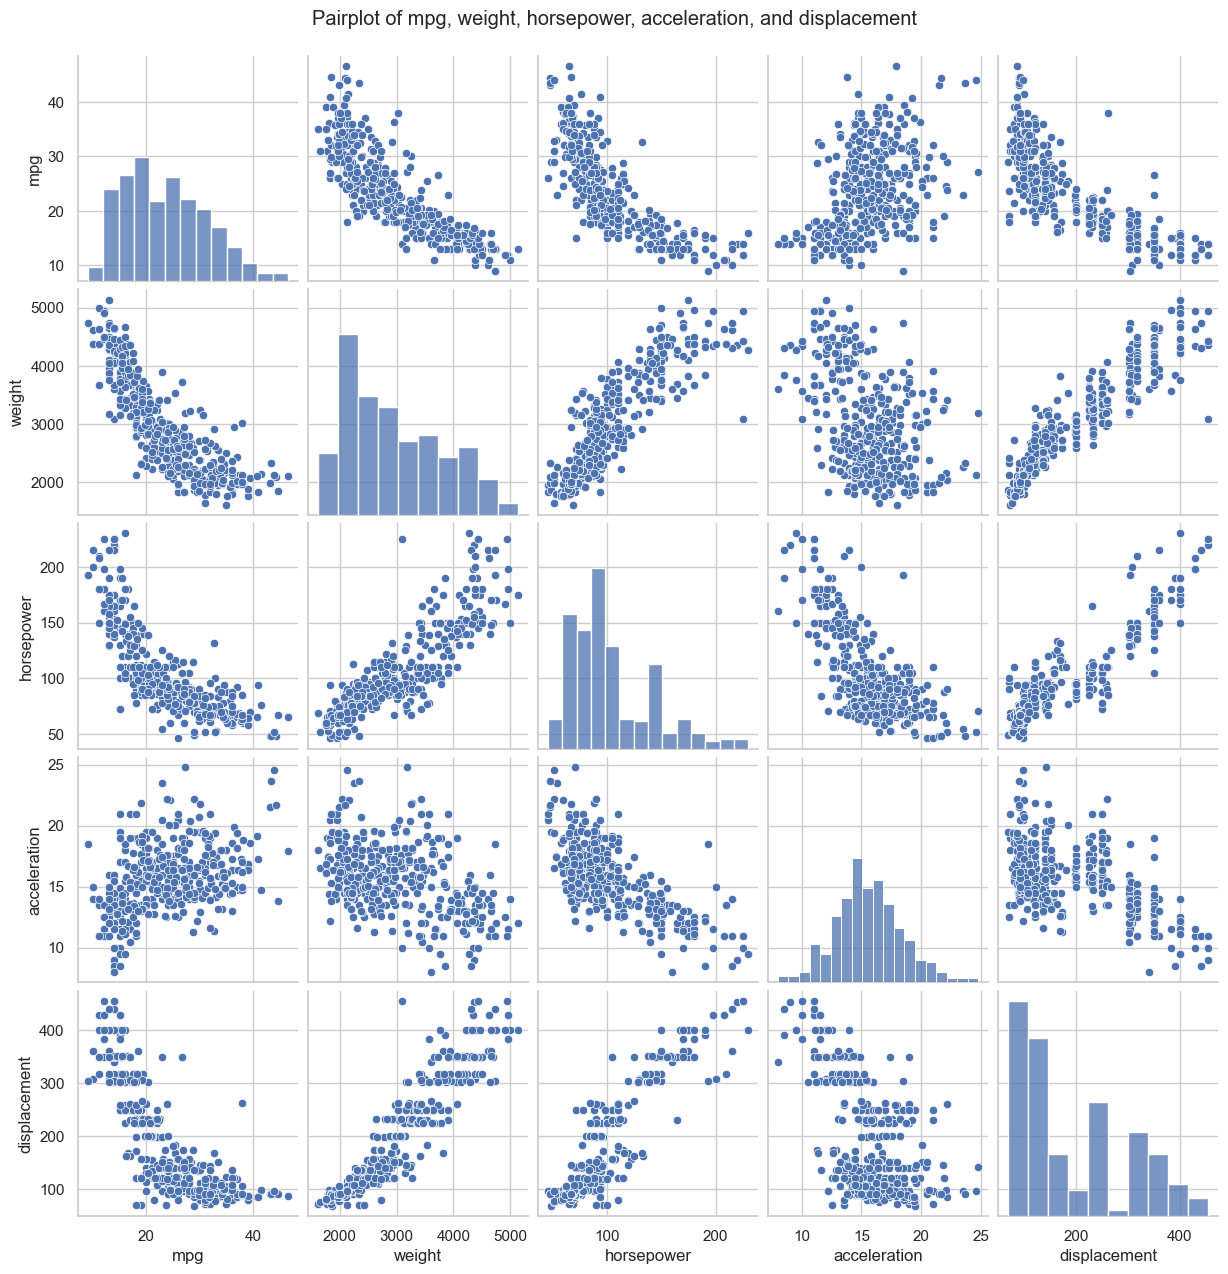

In [24]:
# (a) Pairplot of selected features
cols_pair = ['mpg', 'weight', 'horsepower', 'acceleration', 'displacement']
sns.pairplot(df[cols_pair].dropna(), diag_kind='hist')
plt.suptitle("Pairplot of mpg, weight, horsepower, acceleration, and displacement", y=1.02)
plt.show()

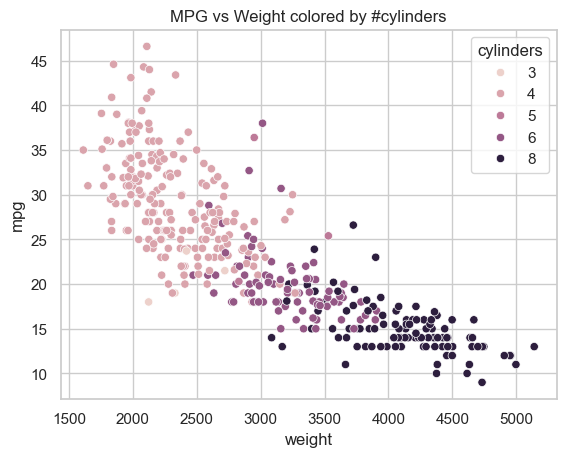

In [25]:
# (b) Scatter: mpg vs weight, colored by cylinders
sns.scatterplot(
    data=df,
    x='weight',
    y='mpg',
    hue='cylinders',
)
plt.title("MPG vs Weight colored by #cylinders")
plt.show()

## 3. Feature engineering

In [ ]:
# TODO: Select features, make all features numeric and normalize values to the same range if necessary


## 4. Model training

In [28]:
 # TODO: Split data into training and testing sets

In [29]:
# TODO: Create a LinerRegression model instance from sklearn and fit the model

## 5. Evaluatation

In [ ]:
#TODO: Predicting on the test set using the fitted model

In [ ]:
# TODO: Calculate evaluation metrics (MAE, MSE, RMSE, R2)